# OVA 5: Regresión lineal con Python

# Clonamos el repositorio para obtener los dataSet

In [ ]:
!git clone https://github.com/joanby/python-ml-course.git

# Damos acceso a nuestro Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Test it
!ls '/content/drive/My Drive'

In [ ]:
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
from google.colab import drive # Montar tu Google drive

# Modelos de Regresión Lineal
## Modelo con datos simulados
* y = a + b * x
* X : 100 valores distribuídos según una N(1.5, 2.5)
* Ye = 5 + 1.9 * x + e
* e estará distribuído según una N(0, 0.8)

In [1]:
import pandas as pd
import numpy as np

In [2]:
x = 1.5 + 2.5 * np.random.randn(100)

In [3]:
res = 0 + 0.8 * np.random.randn(100)

In [4]:
y_pred = 5 + 0.3 * x

In [5]:
y_act = 5 + 0.3 * x + res

In [6]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [7]:
data = pd.DataFrame(
    {
        "x":x_list,
        "y_actual":y_act_list,
        "y_prediccion":y_pred_list
    }
)

In [8]:
data.head()

,x,y_actual,y_prediccion
0,0.445763,5.181348,5.133729
1,1.922469,6.190295,5.576741
2,0.756439,6.325118,5.226932
3,1.758071,5.847538,5.527421
4,-1.579013,3.990324,4.526296


In [9]:
import matplotlib.pyplot as plt

In [10]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

Text(0.5, 1.0, 'Valor Actual vs Predicción')

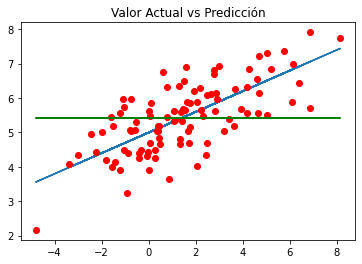

In [11]:
%matplotlib inline
plt.plot(data["x"],data["y_prediccion"])
plt.plot(data["x"], data["y_actual"], "ro")
plt.plot(data["x"],y_mean, "g")
plt.title("Valor Actual vs Predicción")

## ¿Como es la predicción de buena?
* SST = SSD + SSR
* SST : Variabilidad de los datos con respecto de su media
* SSD : Diferencia entre los datos originales y las predicciones que el modelo no es capaz de explicar (errores que deberían seguir una distribución normal)
* SSR : Diferencia entre la regresión y el valor medio que el modelo busca explicar
* R2 = SSR / SST, coeficiente de determinación entre 0 y 1

In [12]:
y_m = np.mean(y_act)
data["SSR"]=(data["y_prediccion"]-y_m)**2
data["SSD"]=(data["y_prediccion"]-data["y_actual"])**2
data["SST"]=(data["y_actual"]-y_m)**2

In [13]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST
0,0.445763,5.181348,5.133729,0.087369,0.002268,0.061486
1,1.922469,6.190295,5.576741,0.021735,0.376449,0.579095
2,0.756439,6.325118,5.226932,0.040958,1.206014,0.802469
3,1.758071,5.847538,5.527421,0.009625,0.102475,0.174913
4,-1.579013,3.990324,4.526296,0.815438,0.287266,2.070686


In [14]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [15]:
SSR

54.71008384758909

In [16]:
SSD

51.43951939725788

In [17]:
SST

101.21039999385397

In [18]:
SSR+SSD

106.14960324484697

In [19]:
R2 = SSR/SST

In [20]:
R2

0.5405579253803104

(array([ 3.,  9.,  9., 13., 22., 10., 15., 10.,  3.,  6.]),
 array([-1.57615518, -1.25722405, -0.93829292, -0.61936179, -0.30043067,
         0.01850046,  0.33743159,  0.65636272,  0.97529385,  1.29422497,
         1.6131561 ]),
 <BarContainer object of 10 artists>)

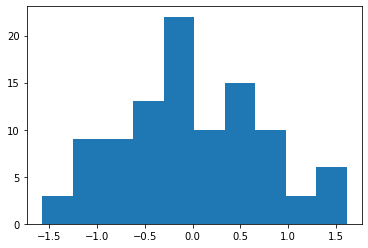

In [21]:
plt.hist(data["y_prediccion"]-data["y_actual"])

## Obteniendo la recta de regresión 

* y = a + b * x
* b = sum((xi - x_m)*(y_i-y_m))/sum((xi-x_m)^2)
* a = y_m - b * x_m

In [22]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_actual"])
x_mean, y_mean

(1.4295087271088212, 5.4293119653299815)

In [23]:
data["beta_n"] = (data["x"]-x_mean)*(data["y_actual"]-y_mean)
data["beta_d"] = (data["x"]-x_mean)**2

In [24]:
beta = sum(data["beta_n"])/sum(data["beta_d"])

In [25]:
alpha = y_mean - beta * x_mean

In [26]:
alpha, beta

(5.019817505840673, 0.28645817386334554)

El modelo lineal obtenido por regresión es:
y = 5.042341442370516 + 1.9044490309709992 * x

In [27]:
data["y_model"] = alpha + beta * data["x"]

In [28]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST,beta_n,beta_d,y_model
0,0.445763,5.181348,5.133729,0.087369,0.002268,0.061486,0.243934,0.967756,5.147510
1,1.922469,6.190295,5.576741,0.021735,0.376449,0.579095,0.375135,0.243010,5.570525
2,0.756439,6.325118,5.226932,0.040958,1.206014,0.802469,-0.602940,0.453023,5.236506
3,1.758071,5.847538,5.527421,0.009625,0.102475,0.174913,0.137413,0.107953,5.523431
4,-1.579013,3.990324,4.526296,0.815438,0.287266,2.070686,4.329227,9.051206,4.567496


In [29]:
SSR = sum((data["y_model"]-y_mean)**2)
SSD = sum((data["y_model"]-data["y_actual"])**2)
SST = sum((data["y_actual"]-y_mean)**2)

In [30]:
SSR, SSD, SST

(49.88237713027072, 51.328022863583286, 101.210399993854)

In [31]:
R2 = SSR / SST
R2

0.49285821549267494

Text(0.5, 1.0, 'Valor Actual vs Predicción')

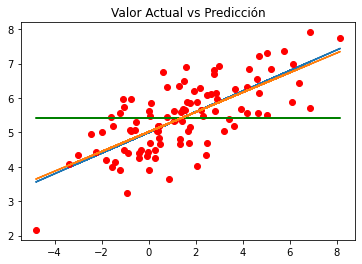

In [32]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

%matplotlib inline
plt.plot(data["x"],data["y_prediccion"])
plt.plot(data["x"], data["y_actual"], "ro")
plt.plot(data["x"],y_mean, "g")
plt.plot(data["x"], data["y_model"])
plt.title("Valor Actual vs Predicción")

## Error estándar de los residuos (RSE)

In [33]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

0.7237094274242161

In [34]:
np.mean(data["y_actual"])

5.4293119653299815

In [35]:
RSE / np.mean(data["y_actual"])

0.13329671089921072

# Clonamos el repositorio para obtener los dataSet

In [ ]:
!git clone https://github.com/joanby/python-ml-course.git

# Damos acceso a nuestro Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Test it
!ls '/content/drive/My Drive'

In [ ]:
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
from google.colab import drive # Montar tu Google drive

# Regresión lineal simple en Python
## El paquete statsmodel para regresión lineal

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("/content/python-ml-course/datasets/ads/Advertising.csv")

In [3]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
import statsmodels.formula.api as smf

In [5]:
lm = smf.ols(formula="Sales~TV", data = data).fit()

In [6]:
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

El modelo lineal predictivo sería 
Sales = 7.032594 + 0.047537 * TV

In [7]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [8]:
lm.rsquared

0.611875050850071

In [9]:
lm.rsquared_adj

0.6099148238341623

In [10]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 19 Sep 2020   Prob (F-statistic):           1.47e-42
Time:                        16:00:18   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
sales_pred = lm.predict(pd.DataFrame(data["TV"]))
sales_pred

0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
         ...    
195     8.848493
196    11.510545
197    15.446579
198    20.513985
199    18.065848
Length: 200, dtype: float64

In [12]:
import matplotlib.pyplot as plt

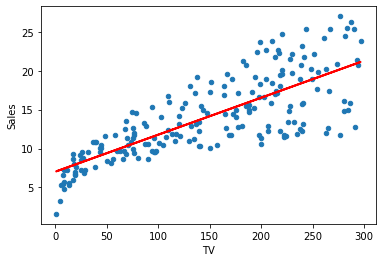

In [13]:
%matplotlib inline
data.plot(kind = "scatter", x = "TV", y ="Sales")
plt.plot(pd.DataFrame(data["TV"]), sales_pred, c="red", linewidth = 2)

In [14]:
data["sales_pred"] = 7.032594 + 0.047537*data["TV"]

In [15]:
data["RSE"] = (data["Sales"]-data["sales_pred"])**2

In [16]:
SSD = sum(data["RSE"])
SSD

2102.5305838896525

In [17]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

3.258656369238098

In [18]:
sales_m = np.mean(data["Sales"])

In [19]:
sales_m

14.022500000000003

In [20]:
error = RSE/sales_m

In [21]:
error

0.2323876890168014

(array([ 4., 10., 13., 17., 40., 42., 33., 16., 17.,  8.]),
 array([-8.3860819 , -6.82624404, -5.26640618, -3.70656832, -2.14673046,
        -0.5868926 ,  0.97294526,  2.53278312,  4.09262098,  5.65245884,
         7.2122967 ]),
 <BarContainer object of 10 artists>)

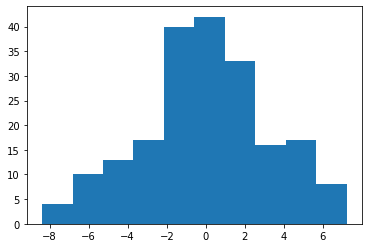

In [22]:
plt.hist((data["Sales"]-data["sales_pred"]))

# Regresión lineal múltiple en Python
## El paquete statsmodel para regresión múltiple
* Sales ~TV
* Sales ~Newspaper
* Sales ~Radio
* Sales ~TV+Newspaper
* Sales ~TV+Radio
* Sales ~Newspaper+Radio
* Sales ~TV+Newspaper+Radio

In [23]:
#Añadir el Newspaper al modelo existente
lm2 = smf.ols(formula="Sales~TV+Newspaper", data = data).fit()

In [24]:
lm2.params

Intercept    5.774948
TV           0.046901
Newspaper    0.044219
dtype: float64

In [25]:
lm2.pvalues

Intercept    3.145860e-22
TV           5.507584e-44
Newspaper    2.217084e-05
dtype: float64

Sales = 5.774948+0.046901*TV + 0.044219*Newspaper

In [26]:
lm2.rsquared

0.6458354938293271

In [27]:
lm2.rsquared_adj

0.6422399150864777

In [28]:
sales_pred = lm2.predict(data[["TV", "Newspaper"]])

In [29]:
sales_pred

0      19.626901
1       9.856348
2       9.646055
3      15.467318
4      16.837102
         ...    
195     8.176802
196    10.551220
197    14.359467
198    22.003458
199    17.045429
Length: 200, dtype: float64

In [30]:
SSD = sum((data["Sales"]-sales_pred)**2)

In [31]:
SSD

1918.5618118968268

In [32]:
RSE = np.sqrt(SSD/(len(data)-2-1))

In [33]:
RSE

3.120719860252885

In [34]:
error = RSE / sales_m

In [35]:
error

0.22255089037282116

In [36]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Sat, 19 Sep 2020   Prob (F-statistic):           3.95e-45
Time:                        16:00:22   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.000       4.739       6.811
TV             0.0469      0.003     18.173      0.000       0.042       0.052
Newspaper      0.0442      0.010      4.346      0.000       0.024       0.064
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.415
Skew:                          -0.093   Prob(JB):                        0.813
Kurtosis:                       3.122   Cond. No.                         410.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
#Añadir la Radio al modelo existente
lm3 = smf.ols(formula="Sales~TV+Radio", data = data).fit()

In [38]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sat, 19 Sep 2020   Prob (F-statistic):           4.83e-98
Time:                        16:00:22   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
sales_pred = lm3.predict(data[["TV", "Radio"]])
SSD = sum((data["Sales"]-sales_pred)**2)
RSE = np.sqrt(SSD/(len(data)-2-1))

In [40]:
RSE

1.681360912508001

In [41]:
RSE/sales_m

0.11990450436855059

In [42]:
#Añadir la Radio al modelo existente
lm4 = smf.ols(formula="Sales~TV+Radio+Newspaper", data = data).fit()

In [43]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 19 Sep 2020   Prob (F-statistic):           1.58e-96
Time:                        16:00:23   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
sales_pred = lm4.predict(data[["TV", "Radio","Newspaper"]])
SSD = sum((data["Sales"]-sales_pred)**2)
RSE = np.sqrt(SSD/(len(data)-3-1))

In [45]:
RSE

1.6855103734147443

In [46]:
RSE/sales_m

0.1202004188564624

## Multicolinealidad 
#### Factor Inflación de la Varianza
* VIF = 1 : Las variables no están correlacionadas
* VIF < 5 : Las variables tienen una correlación moderada y se pueden quedar en el modelo
* VIF >5 : Las variables están altamente correlacionadas y deben desaparecer del modelo.

In [47]:
# Newspaper ~ TV + Radio -> R^2 VIF = 1/(1-R^2)
lm_n = smf.ols(formula="Newspaper~TV+Radio", data = data).fit()
rsquared_n = lm_n.rsquared
VIF = 1/(1-rsquared_n)
VIF

1.1451873787239288

In [48]:
# TV ~ Newspaper + Radio -> R^2 VIF = 1/(1-R^2)
lm_tv = smf.ols(formula="TV~Newspaper+Radio", data=data).fit()
rsquared_tv = lm_tv.rsquared
VIF = 1/(1-rsquared_tv)
VIF

1.0046107849396502

In [49]:
# Radio ~ TV + Newspaper -> R^2 VIF = 1/(1-R^2)
lm_r = smf.ols(formula="Radio~Newspaper+TV", data=data).fit()
rsquared_r = lm_r.rsquared
VIF = 1/(1-rsquared_r)
VIF

1.1449519171055353

In [50]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sat, 19 Sep 2020   Prob (F-statistic):           4.83e-98
Time:                        16:00:23   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Clonamos el repositorio para obtener los dataSet

In [ ]:
!git clone https://github.com/joanby/python-ml-course.git

# Damos acceso a nuestro Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Test it
!ls '/content/drive/My Drive' 

In [ ]:
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
from google.colab import drive # Montar tu Google drive

# Dividir el dataset en conjunto de entrenamiento y de testing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/content/python-ml-course/datasets/ads/Advertising.csv")

In [3]:
a = np.random.randn(len(data))

(array([ 2.,  6., 19., 37., 36., 33., 38., 19.,  7.,  3.]),
 array([-2.70270911, -2.15896235, -1.61521558, -1.07146882, -0.52772206,
         0.0160247 ,  0.55977146,  1.10351822,  1.64726498,  2.19101175,
         2.73475851]),
 <BarContainer object of 10 artists>)

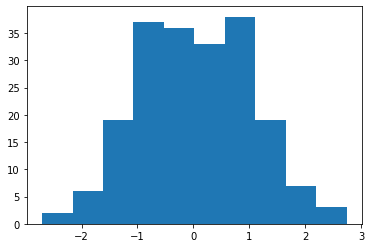

In [4]:
plt.hist(a)

In [5]:
check = (a<0.8)
training = data[check]
testing = data[~check]

In [6]:
len(training), len(testing)

(153, 47)

In [7]:
import statsmodels.formula.api as smf
lm = smf.ols(formula="Sales~TV+Radio", data=training).fit()

In [8]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     662.2
Date:                Sat, 19 Sep 2020   Prob (F-statistic):           3.63e-75
Time:                        16:00:31   Log-Likelihood:                -299.31
No. Observations:                 153   AIC:                             604.6
Df Residuals:                     150   BIC:                             613.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7915      0.339      8.244      0.000       2.122       3.460
TV             0.0473      0.002     29.287      0.000       0.044       0.050
Radio          0.1823      0.009     19.250      0.000       0.164       0.201
==============================================================================
Omnibus:                       47.013   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.046
Skew:                          -1.323   Prob(JB):                     1.55e-23
Kurtosis:                       6.078   Cond. No.                         413.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Sales = 2.9336 + 0.0465 * TV + 0.1807 * Radio

## Validación del modelo con el conjunto de testing

In [9]:
sales_pred = lm.predict(testing)
sales_pred

2      11.974545
3      17.486930
14     18.442728
16     12.671650
20     18.170789
23     16.669633
27     17.191197
30     21.803374
35     17.286561
36     23.400172
38      9.698338
42     21.727070
46      8.838684
50     12.805466
51      9.289993
53     19.851174
55     21.205524
60      5.686218
69     21.049129
71     10.591555
77     13.686881
81     14.879451
88     11.617074
94     10.423352
99     16.789025
100    14.093057
104    20.310634
109    19.774678
116    11.981909
120    14.360545
123    14.922148
131    15.861826
134    11.575051
143     8.777466
144    10.039570
149     9.609892
153    18.131537
161    13.372281
172     7.383516
176    20.045383
180    10.671323
181    14.109203
182     6.488583
190    12.153873
193    18.338123
195     5.272654
197    12.857777
dtype: float64

In [10]:
SSD = sum((testing["Sales"]-sales_pred)**2)
SSD

113.61483512299858

In [11]:
RSE = np.sqrt(SSD/(len(testing)-2-1))
RSE

1.6069086295444783

In [12]:
sales_mean = np.mean(testing["Sales"])
error = RSE/sales_mean
error

0.11100044913079142

<AxesSubplot:xlabel='TV', ylabel='Sales'>

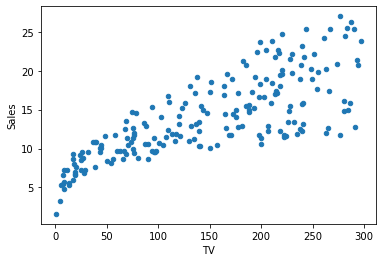

In [15]:
%matplotlib inline
data.plot(kind = "scatter", x = "TV", y ="Sales")
#plt.plot(pd.DataFrame(data["TV"]), sales_pred, c="red", linewidth = 2)

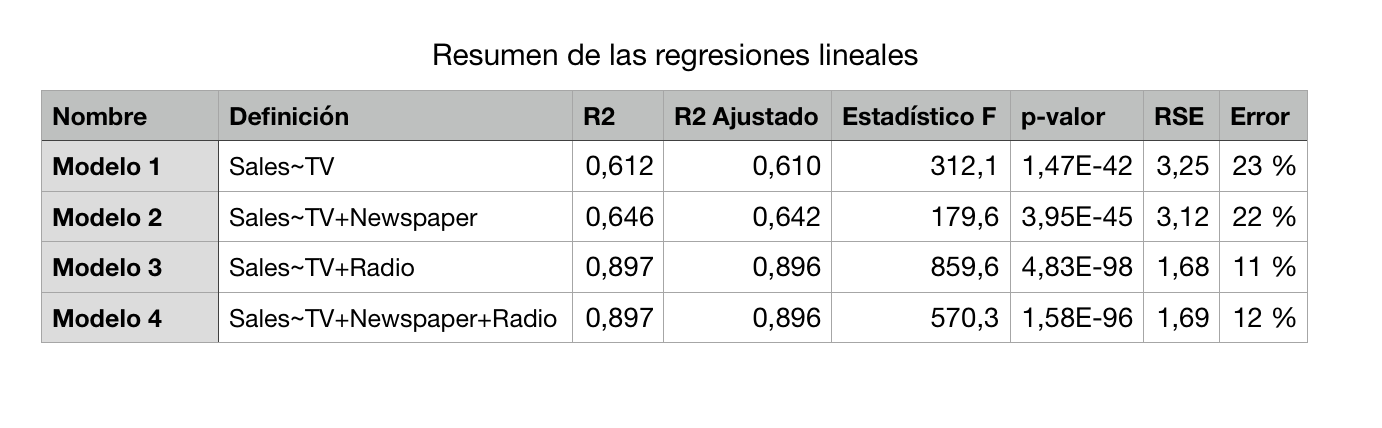

In [14]:
from IPython.display import Image
Image(filename="/content/python-ml-course/notebooks/resources/summary-lm.png")

# Clonamos el repositorio para obtener los dataSet

In [ ]:
!git clone https://github.com/joanby/python-ml-course.git

# Damos acceso a nuestro Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Test it
!ls '/content/drive/My Drive' 

In [ ]:
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
from google.colab import drive # Montar tu Google drive

# Regresión lineal en Python
## El paquete scikit-learn para regresión lineal y la selección de rasgos

In [1]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("/content/python-ml-course/datasets/ads/Advertising.csv")

In [3]:
feature_cols = ["TV", "Radio", "Newspaper"]

In [4]:
X = data[feature_cols]
Y = data["Sales"]

In [14]:
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=2, step=1)
selector = selector.fit(X,Y)

In [15]:
selector.support_

array([ True,  True, False])

In [16]:
selector.ranking_

array([1, 1, 2])

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
X_pred = X[["TV", "Radio"]]

In [19]:
lm = LinearRegression()
lm.fit(X_pred, Y)

LinearRegression()

In [20]:
lm.intercept_

2.921099912405138

In [21]:
lm.coef_

array([0.04575482, 0.18799423])

In [22]:
lm.score(X_pred, Y)

0.8971942610828956

# Clonamos el repositorio para obtener los dataSet

In [ ]:
!git clone https://github.com/joanby/python-ml-course.git

# Damos acceso a nuestro Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Test it
!ls '/content/drive/My Drive' 

In [ ]:
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
from google.colab import drive # Montar tu Google drive

# El tratamiento de las variables categóricas

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("/content/python-ml-course/datasets/ecom-expense/Ecom Expense.csv")

In [3]:
df.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [4]:
dummy_gender = pd.get_dummies(df["Gender"], prefix = "Gender")
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix = "City")

In [5]:
dummy_gender.head()

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [6]:
dummy_city_tier.head()

,City_Tier 1,City_Tier 2,City_Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [7]:
column_names = df.columns.values.tolist()
column_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [8]:
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0


In [9]:
df_new = df_new[column_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


In [10]:
feature_cols = ["Monthly Income", "Transaction Time", 
                "Gender_Female", "Gender_Male", 
                "City_Tier 1", "City_Tier 2", "City_Tier 3",
                "Record"]

In [11]:
X = df_new[feature_cols]
Y = df_new["Total Spend"]

In [12]:
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression()

In [13]:
print(lm.intercept_)
print(lm.coef_)

-79.41713030137271
[ 1.47538980e-01  1.54946125e-01 -1.31025013e+02  1.31025013e+02
  7.67643260e+01  5.51389743e+01 -1.31903300e+02  7.72233446e+02]


In [14]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.14753898049205746),
 ('Transaction Time', 0.15494612549589526),
 ('Gender_Female', -131.02501325554653),
 ('Gender_Male', 131.02501325554647),
 ('City_Tier 1', 76.76432601049476),
 ('City_Tier 2', 55.138974309232474),
 ('City_Tier 3', -131.9033003197273),
 ('Record', 772.2334457445645)]

In [15]:
lm.score(X,Y)

0.9179923586131016

El modelo puede ser escrito como:
* Total_Spend = -79.41713030137362 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545+'Gender_Female'* -131.02501325554567 + 'Gender_Male'* 131.0250132555456+'City_Tier 1'* 76.76432601049527 + 'City_Tier 2'* 55.138974309232474 + 'City_Tier 3'* -131.9033003197278+'Record'* 772.2334457445648
    * Si es hombre y vive en CT1: Total_Spend = 128.37220896466724 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545+'Record'* 772.2334457445648
    * Si es hombre y vive en CT2: Total_Spend = 106.74685726340445 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545 +'Record'* 772.2334457445648
    * Si es hombre y vive en CT3: Total_Spend = -80.29541736555583 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545+'Record'* 772.2334457445648
    * Si es mujer y vive en CT1: Total_Spend = -79.41713030137362 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545 - 131.0250132555456+ 76.76432601049527 +'Record'* 772.2334457445648
    * Si es mujer y vive en CT2: Total_Spend = -79.41713030137362 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545 - 131.0250132555456+ 55.138974309232474  +'Record'* 772.2334457445648
    * Si es mujer y vive en CT3: Total_Spend = -79.41713030137362 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545 - 131.0250132555456-131.9033003197278 +'Record'* 772.2334457445648

In [16]:
 -79.41713030137362 + 131.0250132555456-131.9033003197278

-80.29541736555583

In [17]:
df_new["prediction"] = -79.41713030137362 + df_new['Monthly Income']*0.14753898049205738 + df_new['Transaction Time']* 0.15494612549589545+ df_new['Gender_Female'] * (-131.02501325554567) + df_new['Gender_Male'] * 131.0250132555456+ df_new['City_Tier 1']* 76.76432601049527 +  df_new['City_Tier 2']* 55.138974309232474 + df_new['City_Tier 3']* (-131.9033003197278)+ df_new['Record']* 772.2334457445648

In [18]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335


In [19]:
SSD = np.sum((df_new["prediction"] - df_new["Total Spend"])**2)

In [20]:
SSD

1517733985.3408163

In [21]:
RSE = np.sqrt(SSD/(len(df_new)-len(feature_cols)-1))

In [22]:
RSE

803.1318809818165

In [23]:
sales_mean=np.mean(df_new["Total Spend"])

In [24]:
sales_mean

6163.176415976714

In [25]:
error = RSE/sales_mean

In [26]:
error*100

13.031135680294161

## Eliminar variables dummy redundantes

In [27]:
dummy_gender = pd.get_dummies(df["Gender"], prefix="Gender").iloc[:,1:]
dummy_gender.head()

,Gender_Male
0,0
1,0
2,1
3,0
4,0


In [28]:
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix="City").iloc[:,1:]
dummy_city_tier.head()

,City_Tier 2,City_Tier 3
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0


In [29]:
column_names = df.columns.values.tolist()
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new = df_new[column_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0,1,0


In [30]:
feature_cols = ["Monthly Income", "Transaction Time", "Gender_Male", "City_Tier 2", "City_Tier 3", "Record"]
X = df_new[feature_cols]
Y = df_new["Total Spend"]
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression()

In [31]:
print(lm.intercept_)

-133.67781754642238


In [32]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.1475389804920575),
 ('Transaction Time', 0.15494612549589615),
 ('Gender_Male', 262.05002651109584),
 ('City_Tier 2', -21.62535170126288),
 ('City_Tier 3', -208.66762633022262),
 ('Record', 772.2334457445636)]

In [33]:
lm.score(X,Y)

0.9179923586131016

Coeficientes con todas las variables en el modelo
* ('Monthly Income', 0.14753898049205738),
* ('Transaction Time', 0.15494612549589545),
* ('Gender_Female', -131.02501325554567),
* ('Gender_Male', 131.0250132555456),
* ('City_Tier 1', 76.76432601049527),
* ('City_Tier 2', 55.138974309232474),
* ('City_Tier 3', -131.9033003197278),
* ('Record', 772.2334457445648)
 
 Coeficientes tras enmascarar las variables dummy pertinentes
* 'Monthly Income', 0.14753898049205744),
* ('Transaction Time', 0.15494612549589631),
* ('Gender_Male', 262.05002651109595),
* ('City_Tier 2', -21.62535170126296),
* ('City_Tier 3', -208.66762633022324),
* ('Record', 772.2334457445635)]

Los cambios se reflejan en
* Gender_Male: 
    * antes -> 131.02, 
    * después -> 262.05 = ( 131.02 - (-131.02))
* Gender_Female: 
    * antes -> -131.02,
    * después -> 0
* CT1: 
    * antes -> 76.76,
    * después -> 0
* CT2: 
    * antes -> 55.13, 
    * después -> -21.62 = (55.13 - 76.76)
* CT3: 
    * antes -> -131.90, 
    * después -> -208.66 = (-131.90 - 76.76)

# Transformación de variables para conseguir una relación no lineal

In [34]:
import pandas as pd

In [35]:
data_auto = pd.read_csv("/content/python-ml-course/datasets/auto/auto-mpg.csv")
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [36]:
data_auto.shape

(406, 9)

In [37]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'CV vs MPG')

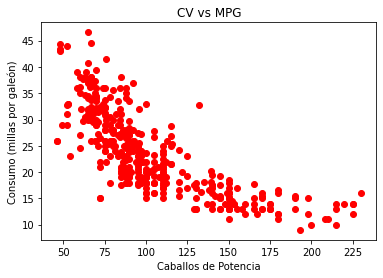

In [38]:
%matplotlib inline
data_auto["mpg"] = data_auto["mpg"].dropna()
data_auto["horsepower"] = data_auto["horsepower"].dropna()
plt.plot(data_auto["horsepower"], data_auto["mpg"], "ro")
plt.xlabel("Caballos de Potencia")
plt.ylabel("Consumo (millas por galeón)")
plt.title("CV vs MPG")

### Modelo de regresión lineal
* mpg = a + b * horsepower

In [39]:
X = data_auto["horsepower"].fillna(data_auto["horsepower"].mean()).to_numpy()
Y = data_auto["mpg"].fillna(data_auto["mpg"].mean())
X_data = X[:,np.newaxis]

In [40]:
lm = LinearRegression()
lm.fit(X_data,Y)

LinearRegression()

In [41]:
type(X)

numpy.ndarray

In [42]:
type(X_data)

numpy.ndarray

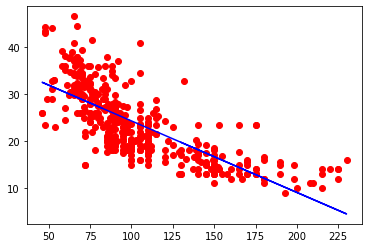

In [43]:
%matplotlib inline
plt.plot(X,Y, "ro")
plt.plot(X, lm.predict(X_data), color="blue")

In [44]:
lm.score(X_data, Y)

0.574653340645025

In [45]:
SSD = np.sum((Y - lm.predict(X_data))**2)
RSE = np.sqrt(SSD/(len(X_data)-1))
y_mean = np.mean(Y)
error = RSE/y_mean
SSD, RSE, y_mean, error*100

(10315.75196006092, 5.046879480825511, 23.51457286432162, 21.46277336163346)

### Modelo de regresión cuadrático
* mpg = a + b * horsepower^2 

In [46]:
X_data = X**2
X_data = np.asarray(X_data)
X_data = X_data[:,np.newaxis]

In [47]:
lm = LinearRegression()
lm.fit(X_data, Y)

LinearRegression()

In [48]:
lm.score(X_data, Y)

0.4849887034823205

In [49]:
SSD = np.sum((Y - lm.predict(X_data))**2)
RSE = np.sqrt(SSD/(len(X_data)-1))
y_mean = np.mean(Y)
error = RSE/y_mean
SSD, RSE, y_mean, error*100

(12490.350340501926, 5.553410772769817, 23.51457286432162, 23.6168898529981)

### Modelo de regresión  lineal y cuadrático
* mpg = a + b * horsepower + c * horsepower^2

In [50]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [51]:
poly = PolynomialFeatures(degree=2)

In [52]:
X = np.asarray(X)
X_data = poly.fit_transform(X[:,np.newaxis])

In [53]:
lm = linear_model.LinearRegression()
lm.fit(X_data, Y)

LinearRegression()

In [54]:
lm.score(X_data, Y)

0.6439066584257469

In [55]:
lm.intercept_

55.026192447081144

In [56]:
lm.coef_

array([ 0.        , -0.43404318,  0.00112615])

mpg = 55.026 -0.434 * hp + 0.00112615 * hp^2

In [57]:
def regresion_validation(X_data, Y, Y_pred):
    SSD = np.sum((Y - Y_pred)**2)
    RSE = np.sqrt(SSD/(len(X_data)-1))
    y_mean = np.mean(Y)
    error = RSE/y_mean
    print("SSD: "+str(SSD)+", RSE: " +str(RSE) + ", Y_mean: " +str(y_mean) +", error: " + str(error*100)+ "%")

In [58]:
for d in range(2,12):
    poly = PolynomialFeatures(degree=d)
    X_data = poly.fit_transform(X[:,np.newaxis])
    lm = linear_model.LinearRegression()
    lm.fit(X_data, Y)
    print("Regresión de grado "+str(d))
    print("R2:" +str(lm.score(X_data, Y)))
    print(lm.intercept_)
    print(lm.coef_)
    regresion_validation(X_data, Y, lm.predict(X_data))

Regresión de grado 2
R2:0.6439066584257469
55.026192447081144
[ 0.         -0.43404318  0.00112615]
SSD: 8636.180643524502, RSE: 4.61778115803654, Y_mean: 23.51457286432162, error: 19.63795466190689%
Regresión de grado 3
R2:0.6444678885560744
58.44877411148498
[ 0.00000000e+00 -5.27113167e-01  1.89736722e-03 -1.95723195e-06]
SSD: 8622.569367428549, RSE: 4.614140736300907, Y_mean: 23.51457286432162, error: 19.622473106036672%
Regresión de grado 4
R2:0.6467674189704502
40.09664385577267
[ 0.00000000e+00  1.62563541e-01 -7.10892744e-03  4.65580255e-05
 -9.15840093e-08]
SSD: 8566.799832491353, RSE: 4.5991947315797574, Y_mean: 23.51457286432162, error: 19.55891250126878%
Regresión de grado 5
R2:0.654751249136743
-40.694029173495565
[ 0.00000000e+00  4.00021894e+00 -7.54802468e-02  6.19621641e-04
 -2.36220984e-06  3.41983153e-09]
SSD: 8373.171388784698, RSE: 4.546921734125024, Y_mean: 23.51457286432162, error: 19.336612067591556%
Regresión de grado 6
R2:0.6572468033307997
-156.9980060652282


# El problema de los outliers

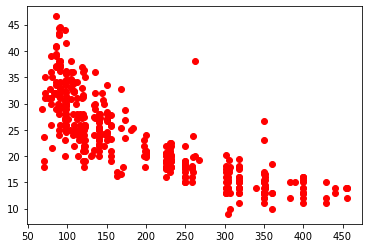

In [59]:
plt.plot(data_auto["displacement"], data_auto["mpg"], "ro")

In [60]:
X = data_auto["displacement"].fillna(data_auto["displacement"].mean()).to_numpy()
X = X[:,np.newaxis]
Y = data_auto["mpg"].fillna(data_auto["mpg"].mean())

lm = LinearRegression()
lm.fit(X, Y)

LinearRegression()

In [61]:
lm.score(X,Y)

0.6261049762826918

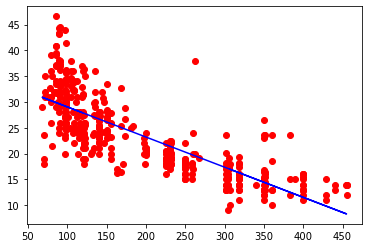

In [62]:
%matplotlib inline
plt.plot(X,Y, "ro")
plt.plot(X, lm.predict(X), color="blue")

In [63]:
data_auto[(data_auto["displacement"]>250)&(data_auto["mpg"]>35)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
395,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)


In [64]:
data_auto[(data_auto["displacement"]>300)&(data_auto["mpg"]>20)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
258,20.2,8,302.0,139.0,3570,12.8,78,1,mercury monarch ghia
305,23.0,8,350.0,125.0,3900,17.4,79,1,cadillac eldorado
372,26.6,8,350.0,105.0,3725,19.0,81,1,oldsmobile cutlass ls


In [65]:
data_auto_clean = data_auto.drop([395, 258, 305, 372])

In [69]:
X = data_auto_clean["displacement"].fillna(data_auto_clean["displacement"].mean()).to_numpy()
X = X[:,np.newaxis]
Y = data_auto_clean["mpg"].fillna(data_auto_clean["mpg"].mean())

lm = LinearRegression()
lm.fit(X, Y)

LinearRegression()

In [70]:
lm.score(X,Y)

0.6466514317531822

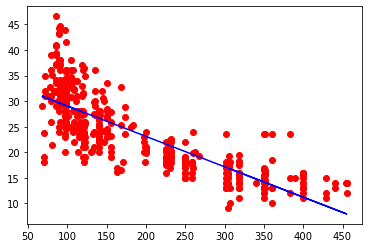

In [71]:
%matplotlib inline
plt.plot(X,Y, "ro")
plt.plot(X, lm.predict(X), color="blue")